<a href="https://colab.research.google.com/github/Varun0801/Machine_Learning_With_Python/blob/master/Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [110]:
data = pd.read_csv("/content/TrainData.csv")
data = pd.DataFrame(data)
data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,No,Few,Yes,5,0,2,0,4,No,0,Yes,Large,Yes,No,B2C,High,Yes,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,No,0,10,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1,USA,No,Few,No,15,0,3,0,7,No,0,Yes,Medium,No,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,Yes,0,2,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1,USA,No,Few,No,7,0,1,1,8,No,0,No,Small,No,No,B2B,High,Yes,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,13,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1,USA,No,Few,No,2,0,4,0,4,No,2,No,Medium,No,No,Both,High,Yes,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,Yes,0,12,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1,USA,No,Few,No,0,0,3,4,4,No,0,No,Large,Yes,No,B2B,High,Yes,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,20,6.400000,No,No,No,2,Both,No,Management,Medium,No


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAX_ID                                    234 non-null    object 
 1   Dependent                                 234 non-null    int64  
 2   Company_Location                          234 non-null    object 
 3   Company_raising_fund                      234 non-null    object 
 4   Company_Industry_count                    234 non-null    object 
 5   Company_mobile_app                        234 non-null    object 
 6   Company_investor_count_seed               234 non-null    int64  
 7   Company_investor_count_Angel_VC           234 non-null    int64  
 8   Company_cofounders_count                  234 non-null    int64  
 9   Company_advisors_count                    234 non-null    int64  
 10  Company_senior_team_count             

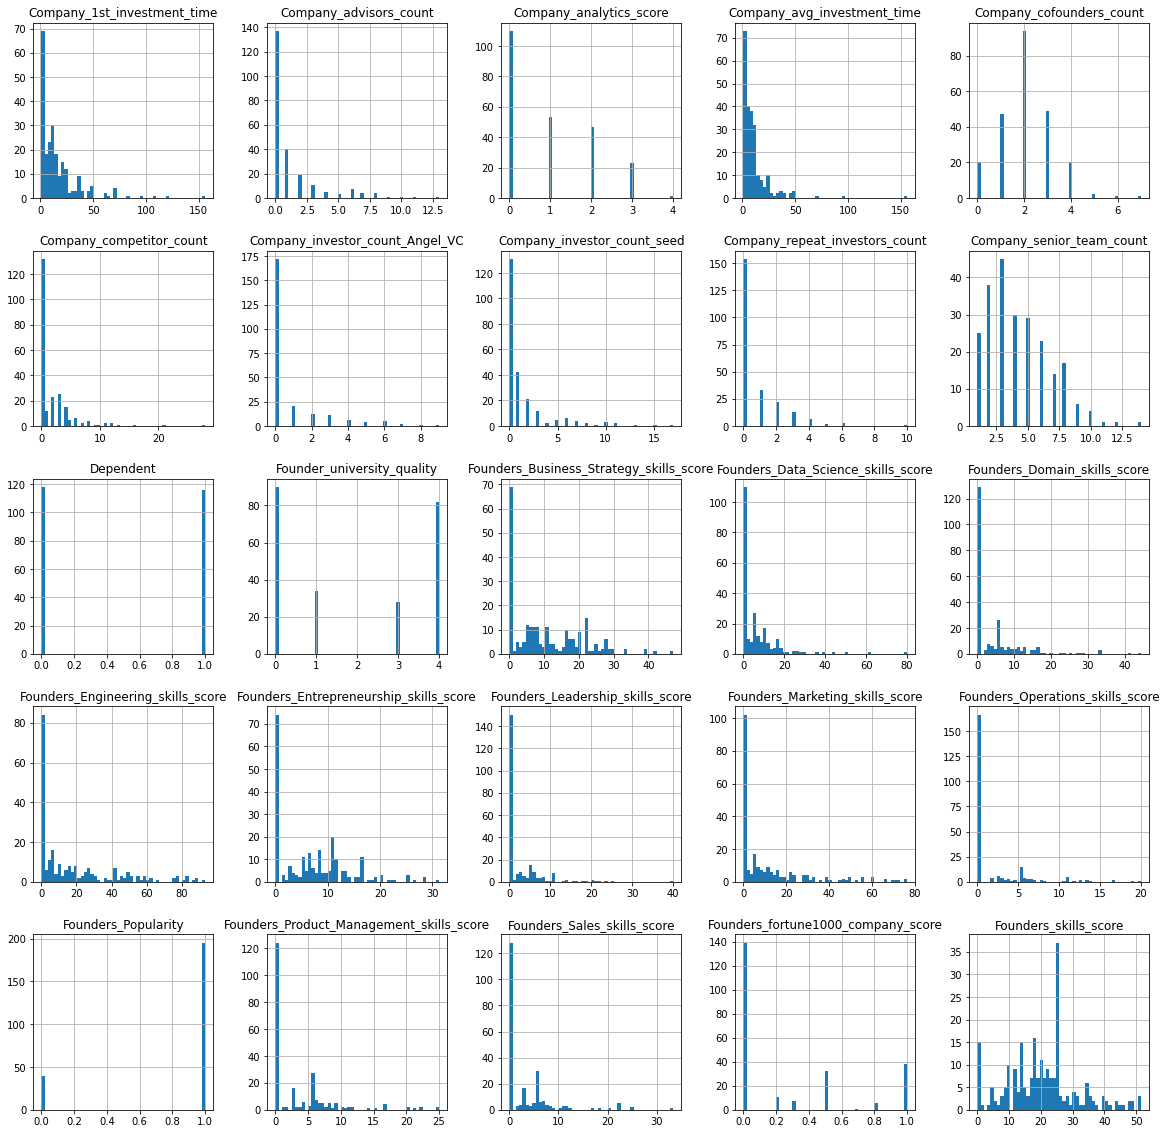

In [112]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,20))
plt.show()

In [113]:
data.replace(to_replace="Yes",value=1,inplace=True)
data.replace(to_replace="No",value=0,inplace=True)
data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,0,Few,1,5,0,2,0,4,0,0,1,Large,1,0,B2C,High,1,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,Product,0,Management,Medium,1
1,Company3,1,USA,0,Few,0,15,0,3,0,7,0,0,1,Medium,0,0,B2B,Medium,1,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,Both,1,Science,Medium,1
2,Company5,1,USA,0,Few,0,7,0,1,1,8,0,0,0,Small,0,0,B2B,High,1,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,Product,0,Technology,Medium,1
3,Company6,1,USA,0,Few,0,2,0,4,0,4,0,2,0,Medium,0,0,Both,High,1,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,Service,0,Science,Medium,1
4,Company8,1,USA,0,Few,0,0,0,3,4,4,0,0,0,Large,1,0,B2B,High,1,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,Both,0,Management,Medium,0


In [114]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['Company_Industry_count']= le.fit_transform(data['Company_Industry_count']) 
data['Founders_previous_company_employee_count']= le.fit_transform(data['Founders_previous_company_employee_count'])
data['Company_business_model']= le.fit_transform(data['Company_business_model']) 
data['Founders_experience']= le.fit_transform(data['Founders_experience'])
data['Founders_Industry_exposure']= le.fit_transform(data['Founders_Industry_exposure'])
data['Founder_education']= le.fit_transform(data['Founder_education'])
data['Founders_profile_similarity']= le.fit_transform(data['Founders_profile_similarity'])
data['Founders_publications']= le.fit_transform(data['Founders_publications'])
data['Company_Product_or_service']= le.fit_transform(data['Company_Product_or_service'])
data['Company_Location']= le.fit_transform(data['Company_Location'])
data['Founder_highest_degree_type']= le.fit_transform(data['Founder_highest_degree_type'])
data['Company_difficulty_obtaining_workforce']= le.fit_transform(data['Company_difficulty_obtaining_workforce'])
data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,2,0,0,1,5,0,2,0,4,0,0,1,0,1,0,1,0,1,0,1,4,1,0.0,2,2,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,0,2,1
1,Company3,1,2,0,0,0,15,0,3,0,7,0,0,1,1,0,0,0,2,1,1,0,1,1,0.2,2,2,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,0,1,2,2,1
2,Company5,1,2,0,0,0,7,0,1,1,8,0,0,0,2,0,0,0,0,1,2,0,0,1,0.0,1,0,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,3,2,1
3,Company6,1,2,0,0,0,2,0,4,0,4,0,2,0,1,0,0,2,0,1,2,1,0,1,0.0,1,2,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,2,0,2,2,1
4,Company8,1,2,0,0,0,0,0,3,4,4,0,0,0,0,1,0,0,0,1,2,1,4,1,0.0,0,0,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,0,0,0,2,0


In [115]:
corr_mat = data.corr()
corr_mat['Dependent'].sort_values(ascending=False)

Dependent                                   1.000000
Company_senior_team_count                   0.340055
Company_analytics_score                     0.195192
Company_1st_investment_time                 0.185040
Company_big_data                            0.169988
Company_crowdfunding                        0.169988
Founders_global_exposure                    0.163387
Founders_Data_Science_skills_score          0.155330
Company_repeat_investors_count              0.151507
Founders_skills_score                       0.148847
Company_top_Angel_VC_funding                0.140708
Company_avg_investment_time                 0.133452
Company_advisors_count                      0.132068
Company_difficulty_obtaining_workforce      0.122161
Company_cofounders_count                    0.107566
Founders_fortune1000_company_score          0.107010
Founders_Engineering_skills_score           0.087970
Founders_big_5_experience                   0.086324
Founder_university_quality                  0.

In [116]:
features = data.drop(['Dependent'],axis=1)
features_1 = features.iloc[:,1:]
target = data.Dependent
features_1.head()

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,2,0,0,1,5,0,2,0,4,0,0,1,0,1,0,1,0,1,0,1,4,1,0.0,2,2,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,0,2,1
1,2,0,0,0,15,0,3,0,7,0,0,1,1,0,0,0,2,1,1,0,1,1,0.2,2,2,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,0,1,2,2,1
2,2,0,0,0,7,0,1,1,8,0,0,0,2,0,0,0,0,1,2,0,0,1,0.0,1,0,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,3,2,1
3,2,0,0,0,2,0,4,0,4,0,2,0,1,0,0,2,0,1,2,1,0,1,0.0,1,2,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,2,0,2,2,1
4,2,0,0,0,0,0,3,4,4,0,0,0,0,1,0,0,0,1,2,1,4,1,0.0,0,0,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,0,0,0,2,0


In [117]:
from sklearn.linear_model import LogisticRegressionCV
logistic_regression = LogisticRegressionCV(
 penalty='l2', Cs=20, random_state=1, n_jobs=-1)
# Train model
model = logistic_regression.fit(features_1, target)

In [118]:
X = features_1
y = target
X_test = X[:50]
y_test = y[:50]
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [119]:
print(y_test)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    0
15    1
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    1
25    0
26    0
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    0
41    1
42    0
43    0
44    0
45    0
46    0
47    0
48    1
49    1
Name: Dependent, dtype: int64


In [120]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
score=accuracy_score(y_test, model.predict(X_test))
roc=roc_auc_score(y_test, model.predict(X_test))
cr=classification_report(y_test, model.predict(X_test))
print(score)
print(roc)
print(cr)

0.7
0.7285714285714285
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.88      0.66      0.75        35

    accuracy                           0.70        50
   macro avg       0.69      0.73      0.68        50
weighted avg       0.77      0.70      0.71        50



In [121]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))
cnf_matrix

array([[12,  3],
       [12, 23]])

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

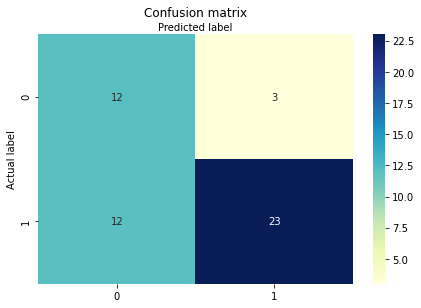

In [123]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))
print("Precision:",metrics.precision_score(y_test, model.predict(X_test)))
print("Recall:",metrics.recall_score(y_test, model.predict(X_test)))

Accuracy: 0.7
Precision: 0.8846153846153846
Recall: 0.6571428571428571


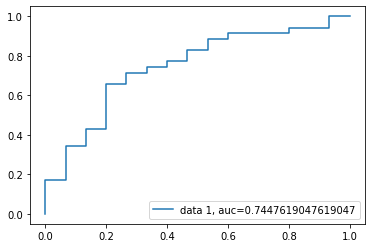

In [125]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [126]:
testdata = pd.read_csv('/content/TestData.csv')
testdata = pd.DataFrame(testdata)
testdata.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,NaN,USA,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No,0,16,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,NaN,USA,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Yes,2,1,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,NaN,USA,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.0,5.555556,No,0,11,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,NaN,USA,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.0,20.833333,No,0,5,5.000000,No,No,No,1,Product,No,Science,High,No
4,Company12,NaN,USA,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.0,0.000000,No,0,18,3.850000,No,No,No,0,Product,No,Science,Medium,Yes


In [127]:
testdata_1 = testdata.drop(['Dependent',],axis=1).copy()
testdata_2 = testdata_1.drop(['CAX_ID'],axis=1)
testdata_2

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,USA,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,16,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,USA,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Yes,2,1,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,USA,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.000000,5.555556,No,0,11,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,USA,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.000000,20.833333,No,0,5,5.000000,No,No,No,1,Product,No,Science,High,No
4,USA,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.000000,0.000000,No,0,18,3.850000,No,No,No,0,Product,No,Science,Medium,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,USA,No,single,No,0,2,3,0,2,No,2,No,Medium,No,No,B2C,High,No,Low,Bachelors,1,1,0.0,None,None,23.0,7.142857,0.0,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,No,4,1,12.000000,No,No,No,0,Product,Yes,Science,Medium,No
76,USA,No,Few,No,1,0,1,0,1,No,1,No,Small,Yes,No,B2B,High,Yes,Low,Bachelors,0,1,0.8,None,Few,25.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,1,14,14.000000,No,No,No,1,Service,Yes,Management,Low,No
77,Europe,No,Few,No,2,0,2,0,2,No,0,No,Small,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,None,Many,12.0,7.692308,0.0,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,No,0,24,24.000000,No,No,No,2,Product,Yes,Technology,Low,No
78,Other,No,Few,No,3,0,3,0,3,No,0,No,Medium,Yes,No,B2B,High,Yes,Medium,Bachelors,4,1,0.0,None,None,8.0,14.444444,0.0,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,No,4,1,1.000000,No,No,No,0,Product,No,Technology,Low,No


In [128]:
testdata_2.replace(to_replace="Yes",value=1,inplace=True)
testdata_2.replace(to_replace="No",value=0,inplace=True)
testdata_2.head()

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,USA,0,single,0,2,0,1,2,2,1,4,0,Small,0,0,B2C,High,1,Low,Masters,4,1,0.0,None,None,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,16,11.560000,0,0,0,0,Service,1,Management,Low,0
1,USA,0,Few,0,6,0,2,0,4,1,0,0,Large,1,0,B2B,Medium,1,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1,2,1,8.700000,1,0,0,0,Product,1,Technology,Medium,1
2,USA,0,single,0,7,0,2,9,2,0,4,0,Small,1,0,B2B,High,1,Medium,PhD,0,1,0.0,Low,None,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.0,5.555556,0,0,11,7.311111,0,0,0,1,Both,1,Technology,Medium,0
3,USA,0,Few,0,0,0,3,4,3,0,0,1,Medium,1,0,B2B,High,1,High,PhD,4,1,0.0,Medium,None,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.0,20.833333,0,0,5,5.000000,0,0,0,1,Product,0,Science,High,0
4,USA,0,Few,0,0,1,0,1,7,0,1,0,Small,1,0,B2B,High,1,High,Masters,4,1,0.0,Low,Few,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.0,0.000000,0,0,18,3.850000,0,0,0,0,Product,0,Science,Medium,1


In [129]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
testdata_2['Company_Industry_count']= le.fit_transform(testdata_2['Company_Industry_count']) 
testdata_2['Founders_previous_company_employee_count']= le.fit_transform(testdata_2['Founders_previous_company_employee_count'])
testdata_2['Company_business_model']= le.fit_transform(testdata_2['Company_business_model']) 
testdata_2['Founders_experience']= le.fit_transform(testdata_2['Founders_experience'])
testdata_2['Founders_Industry_exposure']= le.fit_transform(testdata_2['Founders_Industry_exposure'])
testdata_2['Founder_education']= le.fit_transform(testdata_2['Founder_education'])
testdata_2['Founders_profile_similarity']= le.fit_transform(testdata_2['Founders_profile_similarity'])
testdata_2['Founders_publications']= le.fit_transform(testdata_2['Founders_publications'])
testdata_2['Company_Product_or_service']= le.fit_transform(testdata_2['Company_Product_or_service'])
testdata_2['Company_Location']= le.fit_transform(testdata_2['Company_Location'])
testdata_2['Founder_highest_degree_type']= le.fit_transform(testdata_2['Founder_highest_degree_type'])
testdata_2['Company_difficulty_obtaining_workforce']= le.fit_transform(testdata_2['Company_difficulty_obtaining_workforce'])
testdata_2.head()

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,2,0,2,0,2,0,1,2,2,1,4,0,2,0,0,1,0,1,1,1,4,1,0.0,3,2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,16,11.560000,0,0,0,0,2,1,0,1,0
1,2,0,0,0,6,0,2,0,4,1,0,0,0,1,0,0,2,1,1,0,1,1,0.0,2,2,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1,2,1,8.700000,1,0,0,0,1,1,3,2,1
2,2,0,2,0,7,0,2,9,2,0,4,0,2,1,0,0,0,1,2,2,0,1,0.0,1,2,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.0,5.555556,0,0,11,7.311111,0,0,0,1,0,1,3,2,0
3,2,0,0,0,0,0,3,4,3,0,0,1,1,1,0,0,0,1,0,2,4,1,0.0,2,2,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.0,20.833333,0,0,5,5.000000,0,0,0,1,1,0,2,0,0
4,2,0,0,0,0,1,0,1,7,0,1,0,2,1,0,0,0,1,0,1,4,1,0.0,1,0,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.0,0.000000,0,0,18,3.850000,0,0,0,0,1,0,2,2,1


In [130]:
model.predict(testdata_2)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [131]:
Dependent = model.predict(testdata_2)
print(Dependent)

[0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0]


In [133]:
testdata['Dependent'] = Dependent


In [134]:
testdata

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,0,USA,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,16,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,0,USA,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Yes,2,1,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,1,USA,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.000000,5.555556,No,0,11,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,0,USA,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.000000,20.833333,No,0,5,5.000000,No,No,No,1,Product,No,Science,High,No
4,Company12,0,USA,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.000000,0.000000,No,0,18,3.850000,No,No,No,0,Product,No,Science,Medium,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Company312,0,USA,No,single,No,0,2,3,0,2,No,2,No,Medium,No,No,B2C,High,No,Low,Bachelors,1,1,0.0,None,None,23.0,7.142857,0.0,25.000000,0.000000,0.000000,0.000000,7.142857,7.142857,3.571429,0.000000,No,4,1,12.000000,No,No,No,0,Product,Yes,Science,Medium,No
76,Company288,0,USA,No,Few,No,1,0,1,0,1,No,1,No,Small,Yes,No,B2B,High,Yes,Low,Bachelors,0,1,0.8,None,Few,25.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,1,14,14.000000,No,No,No,1,Service,Yes,Management,Low,No
77,Company293,0,Europe,No,Few,No,2,0,2,0,2,No,0,No,Small,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,None,Many,12.0,7.692308,0.0,23.076923,0.000000,0.000000,0.000000,11.538462,3.846154,0.000000,3.846154,No,0,24,24.000000,No,No,No,2,Product,Yes,Technology,Low,No
78,Company300,0,Other,No,Few,No,3,0,3,0,3,No,0,No,Medium,Yes,No,B2B,High,Yes,Medium,Bachelors,4,1,0.0,None,None,8.0,14.444444,0.0,0.000000,0.000000,0.000000,13.333333,6.666667,0.000000,14.444444,0.000000,No,4,1,1.000000,No,No,No,0,Product,No,Technology,Low,No


In [138]:
dataframe_1 = testdata.iloc[:,:2]
dataframe_1 

,CAX_ID,Dependent
0,Company1,0
1,Company4,0
2,Company7,1
3,Company10,0
4,Company12,0
...,...,...
75,Company312,0
76,Company288,0
77,Company293,0
78,Company300,0


In [139]:
dataframe_1.to_csv('Output.csv') 